In [1]:
import csv
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0254 - loss: 2.0442
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0274 - loss: 2.0357 - val_accuracy: 0.0779 - val_loss: 1.9667
Epoch 2/1000
30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1055 - loss: 1.9492 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1140 - loss: 1.9458 - val_accuracy: 0.2593 - val_loss: 1.8774
Epoch 3/1000
32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2732 - loss: 1.8656 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2736 - loss: 1.8637 - val_accuracy: 0.2701 - val_loss: 1.7878
Epoch 4/1000
23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 1.7843 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3707 - loss: 1.3740 - val_accuracy: 0.3879 - val_loss: 1.3297
Epoch 25/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3609 - loss: 1.3877
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3610 - loss: 1.3873 - val_accuracy: 0.3920 - val_loss: 1.3250
Epoch 26/1000
32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3737 - loss: 1.3605
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3744 - loss: 1.3596 - val_accuracy: 0.3859 - val_loss: 1.3198
Epoch 27/1000
19/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3538 - loss: 1.3740 
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3620 - loss: 1.3681 - val_accuracy: 0.3900 - val_loss: 1.3149
Epoch 28/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 

22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 1.2325 
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5123 - loss: 1.2291 - val_accuracy: 0.5999 - val_loss: 1.1327
Epoch 49/1000
29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5211 - loss: 1.2045 
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5206 - loss: 1.2052 - val_accuracy: 0.5978 - val_loss: 1.1184
Epoch 50/1000
18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5285 - loss: 1.1856 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5278 - loss: 1.1886 - val_accuracy: 0.6005 - val_loss: 1.1057
Epoch 51/1000
29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5152 - loss: 1.2058 
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5781 - loss: 1.0504 - val_accuracy: 0.6236 - val_loss: 0.9311
Epoch 72/1000
20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5837 - loss: 1.0381 
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5838 - loss: 1.0415 - val_accuracy: 0.6249 - val_loss: 0.9161
Epoch 73/1000
17/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5959 - loss: 1.0255 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5947 - loss: 1.0284 - val_accuracy: 0.6229 - val_loss: 0.9094
Epoch 74/1000
25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5825 - loss: 1.0443 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5827 - loss: 1.0441 - val_accuracy: 0.6391 - val_loss: 0.8985
Epoch 75/1000
14/35 ━━━━━━━━━━━━━━━━━━━━ 0

18/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6236 - loss: 0.9746 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6181 - loss: 0.9743 - val_accuracy: 0.6188 - val_loss: 0.8560
Epoch 96/1000
26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6093 - loss: 0.9854 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6104 - loss: 0.9865 - val_accuracy: 0.6100 - val_loss: 0.8564
Epoch 97/1000
25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - loss: 0.9674 
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6309 - loss: 0.9709 - val_accuracy: 0.6242 - val_loss: 0.8438
Epoch 98/1000
31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5999 - loss: 0.9954 
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6319 - loss: 0.9596 - val_accuracy: 0.5985 - val_loss: 0.8381
Epoch 119/1000
25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6202 - loss: 0.9419 
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6213 - loss: 0.9456 - val_accuracy: 0.6073 - val_loss: 0.8324
Epoch 120/1000
25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 0.9592 
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6219 - loss: 0.9586 - val_accuracy: 0.6121 - val_loss: 0.8318
Epoch 121/1000
26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - loss: 0.9306 
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6456 - loss: 0.9328 - val_accuracy: 0.5917 - val_loss: 0.8435
Epoch 122/1000
26/35 ━━━━━━━━━━━━━━━

Epoch 142/1000
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6477 - loss: 0.9081
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6470 - loss: 0.9095 - val_accuracy: 0.6209 - val_loss: 0.8028
Epoch 143/1000
33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6328 - loss: 0.9741
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6334 - loss: 0.9708 - val_accuracy: 0.6181 - val_loss: 0.8052
Epoch 144/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6367 - loss: 0.9087
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6366 - loss: 0.9093 - val_accuracy: 0.6175 - val_loss: 0.8062
Epoch 145/1000
20/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6652 - loss: 0.9084 
Epoch 145: saving model to model/keypoint_classifier/keypoint_cla

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6433 - loss: 0.9264 - val_accuracy: 0.6019 - val_loss: 0.8034
Epoch 166/1000
22/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6259 - loss: 0.9446 
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6326 - loss: 0.9377 - val_accuracy: 0.6236 - val_loss: 0.7853
Epoch 167/1000
31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6465 - loss: 0.9206 
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6479 - loss: 0.9188 - val_accuracy: 0.6141 - val_loss: 0.7867
Epoch 168/1000
31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - loss: 0.9149 
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6597 - loss: 0.9140 - val_accuracy: 0.6276 - val_loss: 0.7749
Epoch 169/1000
27/35 ━━━━━━━━━━━━━━━

Epoch 189/1000
28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - loss: 0.9073 
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6571 - loss: 0.9044 - val_accuracy: 0.6263 - val_loss: 0.7617
Epoch 190/1000
30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.9042 
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6522 - loss: 0.9009 - val_accuracy: 0.6202 - val_loss: 0.7775
Epoch 191/1000
30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - loss: 0.8793 
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6589 - loss: 0.8818 - val_accuracy: 0.6297 - val_loss: 0.7703
Epoch 192/1000
23/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - loss: 0.8984 
Epoch 192: saving model to model/keypoint_classifier/keypoint_

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6308 - loss: 0.7585 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[0.11212792 0.6407486  0.21171628 0.00662802 0.02294772 0.00479771
 0.0010338 ]
1


# 混同行列

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: C:\Project_HER\hand-gesture-recognition-mediapipe\hernew\scripts\python.exe -m pip install --upgrade pip


In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: C:\Project_HER\hand-gesture-recognition-mediapipe\hernew\scripts\python.exe -m pip install --upgrade pip


In [17]:
pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: C:\Project_HER\hand-gesture-recognition-mediapipe\hernew\scripts\python.exe -m pip install --upgrade pip


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


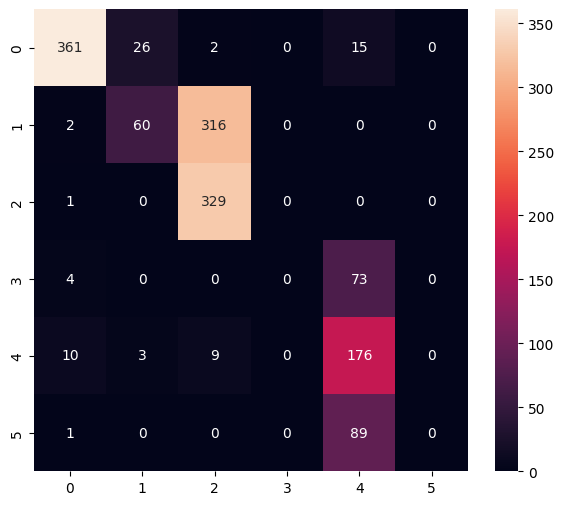

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       404
           1       0.67      0.16      0.26       378
           2       0.50      1.00      0.67       330
           3       0.00      0.00      0.00        77
           4       0.50      0.89      0.64       198
           5       0.00      0.00      0.00        90

    accuracy                           0.63      1477
   macro avg       0.44      0.49      0.41      1477
weighted avg       0.61      0.63      0.55      1477



C:\Project_HER\hand-gesture-recognition-mediapipe\hernew\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Project_HER\hand-gesture-recognition-mediapipe\hernew\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Project_HER\hand-gesture-recognition-mediapipe\hernew\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [19]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [20]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\sdswa\AppData\Local\Temp\tmp7s78aewf\assets


INFO:tensorflow:Assets written to: C:\Users\sdswa\AppData\Local\Temp\tmp7s78aewf\assets


Saved artifact at 'C:\Users\sdswa\AppData\Local\Temp\tmp7s78aewf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2348678657424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2348678656272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2348678650128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2348678885648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2348678884112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2348678883920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2348678884496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2348678883728: TensorSpec(shape=(), dtype=tf.resource, name=None)


7316

# 推論テスト

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [22]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 3.01 ms


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.1121279  0.6407486  0.21171626 0.00662802 0.02294772 0.00479771
 0.0010338 ]
1
